# Kütüphaneleri yüklüyorum

In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype
import plotly.graph_objs as go
from plotly.offline import iplot
from wordcloud import WordCloud 
from matplotlib import rcParams

In [2]:
#datayı tanımlıyorum, data klasörünün altındaki timesData.csv'yi alıyorum

In [3]:
df = pd.read_csv("data/timesData.csv")

In [4]:
#boyut

In [5]:
df.shape

(2603, 14)

In [6]:
#bilgi

In [7]:
df.info

<bound method DataFrame.info of      world_rank                        university_name  \
0             1                     Harvard University   
1             2     California Institute of Technology   
2             3  Massachusetts Institute of Technology   
3             4                    Stanford University   
4             5                   Princeton University   
...         ...                                    ...   
2598    601-800                    Yeungnam University   
2599    601-800            Yıldız Technical University   
2600    601-800               Yokohama City University   
2601    601-800           Yokohama National University   
2602    601-800                     Yuan Ze University   

                       country  teaching international  research  citations  \
0     United States of America      99.7          72.4      98.7       98.8   
1     United States of America      97.7          54.6      98.0       99.9   
2     United States of America    

In [8]:
#veri tiplerine bakıyorum

In [9]:
df.dtypes

world_rank                 object
university_name            object
country                    object
teaching                  float64
international              object
research                  float64
citations                 float64
income                     object
total_score                object
num_students               object
student_staff_ratio       float64
international_students     object
female_male_ratio          object
year                        int64
dtype: object

In [10]:
#ilk 5 satır

In [11]:
df.head(5)

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011


In [12]:
#son 5 satır

In [13]:
df.tail(5)

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
2598,601-800,Yeungnam University,South Korea,18.6,24.3,10.9,26.5,35.4,-,"21,958",15.3,3%,48 : 52,2016
2599,601-800,Yıldız Technical University,Turkey,14.5,14.9,7.6,19.3,44.0,-,"31,268",28.7,2%,36 : 64,2016
2600,601-800,Yokohama City University,Japan,24.0,16.1,10.2,36.4,37.9,-,"4,122",3.7,3%,NaN,2016
2601,601-800,Yokohama National University,Japan,20.1,23.3,16.0,13.5,40.4,-,"10,117",12.1,8%,28 : 72,2016
2602,601-800,Yuan Ze University,Taiwan,16.2,17.7,18.3,28.6,39.8,-,"8,663",20.6,4%,43 : 57,2016


In [15]:
#sütunların isimlerini gösteriyorum

In [16]:
df.columns

Index(['world_rank', 'university_name', 'country', 'teaching', 'international',
       'research', 'citations', 'income', 'total_score', 'num_students',
       'student_staff_ratio', 'international_students', 'female_male_ratio',
       'year'],
      dtype='object')

In [17]:
df.describe().T#Eksik gözlemleri göz ardı eder

,count,mean,std,min,25%,50%,75%,max
teaching,2603.0,37.801498,17.604218,9.9,24.700,33.9,46.40,99.7
research,2603.0,35.910257,21.254805,2.9,19.600,30.5,47.25,99.4
citations,2603.0,60.921629,23.073219,1.2,45.500,62.5,79.05,100.0
student_staff_ratio,2544.0,18.445283,11.458698,0.6,11.975,16.1,21.50,162.6
year,2603.0,2014.075682,1.685733,2011.0,2013.000,2014.0,2016.00,2016.0


In [256]:
df.describe(include="all")#hepsi

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
count,2603,2603,2603,2603.000000,2603,2603.000000,2603.000000,2603.000000,2603.000000,2544,2603.000000,2603.000000,2370,2603.000000
unique,250,818,72,NaN,804,NaN,NaN,NaN,NaN,794,NaN,NaN,69,NaN
top,301-350,London School of Economics and Political Science,United States of America,NaN,20.7,NaN,NaN,NaN,NaN,"11,074",NaN,NaN,54 : 46,NaN
freq,248,6,659,NaN,10,NaN,NaN,NaN,NaN,6,NaN,NaN,185,NaN
mean,NaN,NaN,NaN,37.801498,NaN,35.910257,60.921629,44.877833,27.612447,NaN,18.445283,0.154440,NaN,2014.075682
std,NaN,NaN,NaN,17.604218,NaN,21.254805,23.073219,24.396057,31.080443,NaN,11.328041,0.104542,NaN,1.685733
min,NaN,NaN,NaN,9.900000,NaN,2.900000,1.200000,0.000000,0.000000,NaN,0.600000,0.000000,NaN,2011.000000
25%,NaN,NaN,NaN,24.700000,NaN,19.600000,45.500000,31.400000,0.000000,NaN,12.050000,0.080000,NaN,2013.000000
50%,NaN,NaN,NaN,33.900000,NaN,30.500000,62.500000,39.500000,0.000000,NaN,16.300000,0.140000,NaN,2014.000000
75%,NaN,NaN,NaN,46.400000,NaN,47.250000,79.050000,56.000000,54.800000,NaN,21.200000,0.210000,NaN,2016.000000


In [19]:
#Hiç eksik(null) değer var mı?

In [20]:
df.isnull().values.any()

True

In [21]:
#toplamı

In [22]:
df.isnull().sum()

world_rank                  0
university_name             0
country                     0
teaching                    0
international               0
research                    0
citations                   0
income                      0
total_score                 0
num_students               59
student_staff_ratio        59
international_students     67
female_male_ratio         233
year                        0
dtype: int64

In [23]:
df.fillna(df.mean(), inplace = True)

In [24]:
#kontrol ediyoruz

In [25]:
df.isnull().sum()

world_rank                  0
university_name             0
country                     0
teaching                    0
international               0
research                    0
citations                   0
income                      0
total_score                 0
num_students               59
student_staff_ratio         0
international_students     67
female_male_ratio         233
year                        0
dtype: int64

In [26]:
#null olan değerleri değiştirmek için veri tiplerine tekrar bakıyoruz

In [27]:
df.dtypes

world_rank                 object
university_name            object
country                    object
teaching                  float64
international              object
research                  float64
citations                 float64
income                     object
total_score                object
num_students               object
student_staff_ratio       float64
international_students     object
female_male_ratio          object
year                        int64
dtype: object

In [31]:
#yıllara göre artan kız erkek oranı

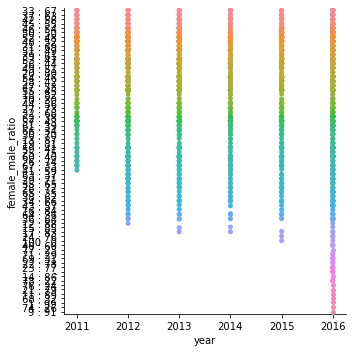

In [32]:
sns.catplot(x= "year", y="female_male_ratio",data=df)

In [34]:
#gelirleri karşılaştırma

In [258]:
df["income"].mean()#ortalama

44.87783326930462

In [36]:
#arada NAN değerler olduğu için hata veriyor

In [37]:
df["income"].fillna(0,inplace=True)

In [ ]:
#Hiç null değer var mı?

In [39]:
df["income"].isnull().values.any()

False

In [42]:
#öğrenci çalışan oranı ortalaması

In [43]:
df["student_staff_ratio"].mean()

18.445283018867965

In [44]:
#öğrenci çalışan oranı minimumu

In [45]:
df["student_staff_ratio"].min()

0.6

In [46]:
#öğrenci çalışan oranı maximumu

In [47]:
df["student_staff_ratio"].max()

162.6

In [48]:
#histogram grafik ile gösterimi

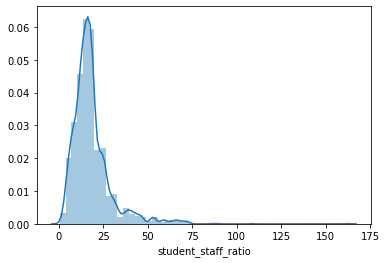

In [49]:
sns.distplot(df.student_staff_ratio, kde=True)

In [50]:
df

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2598,601-800,Yeungnam University,South Korea,18.6,24.3,10.9,26.5,35.4,-,"21,958",15.3,3%,48 : 52,2016
2599,601-800,Yıldız Technical University,Turkey,14.5,14.9,7.6,19.3,44.0,-,"31,268",28.7,2%,36 : 64,2016
2600,601-800,Yokohama City University,Japan,24.0,16.1,10.2,36.4,37.9,-,"4,122",3.7,3%,NaN,2016
2601,601-800,Yokohama National University,Japan,20.1,23.3,16.0,13.5,40.4,-,"10,117",12.1,8%,28 : 72,2016


In [51]:
df["teaching"].mean()

37.80149827122554

In [290]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

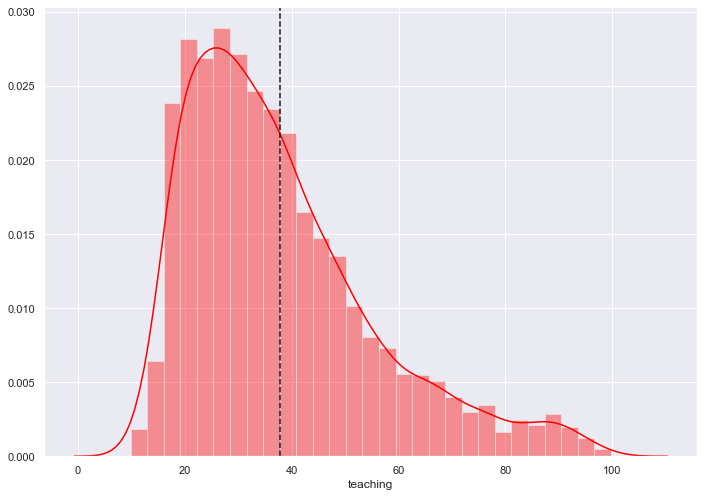

In [291]:
ax=sns.distplot(df.teaching, kde=True,color="red",
             fit_kws={"color":"yellow"},label="Label-1",hist="teaching")#kde mavi çizi
plt.axvline(37.8, color="k", linestyle="--")

In [53]:
#En çok üniversite sokan ilk 10 ülkenin listesi

In [295]:
df["country"].value_counts().head(10)

United States of America    659
United Kingdom              300
Germany                     152
Australia                   117
Canada                      108
Japan                        98
Italy                        94
China                        83
Netherlands                  75
France                       73
Name: country, dtype: int64

In [55]:
df["country"].value_counts().mean()#Türkiye 33 ile ortalamanın altında

36.15277777777778

In [56]:
#Amerika'nın listedeki üniversite sayıları

In [57]:
df_usa = df["country"].value_counts()["United States of America"]
df["country"].value_counts()["United States of America"]

659

In [58]:
#Türkiye'nin listedeki üniversite sayıları 

In [59]:
df["country"].value_counts()["Turkey"]

33

# Amerika ve Türkiye'nin karşılaştırılması

In [60]:
#Türkiye'deki üniversitelerden data frame yaptım

In [61]:
df_tr = df[df["country"]=="Turkey"].copy()


In [62]:
df_tr

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
111,112,Bilkent University,Turkey,34.3,47.7,36.1,95.7,32.4,55.4,NaN,18.445283,NaN,NaN,2011
182,183,Middle East Technical University,Turkey,39.5,27.2,39.5,66.4,43.9,47.7,"25,779",22.200000,7%,44 : 56,2011
401,201-225,Bilkent University,Turkey,27.9,48.5,22.3,60.8,29.4,-,NaN,18.445283,NaN,NaN,2012
480,276-300,Istanbul Technical University,Turkey,25.1,18.9,18.2,48.9,99.1,-,"34,550",16.000000,5%,34 : 66,2012
482,276-300,Middle East Technical University,Turkey,37.0,23.5,28.9,35.1,43.2,-,"25,779",22.200000,7%,44 : 56,2012
506,301-350,Boğaziçi University,Turkey,24.5,36.2,19.7,45.7,34.7,-,"11,506",25.000000,7%,50 : 50,2012
808,201-225,Middle East Technical University,Turkey,50.8,28.0,46.0,44.6,50.6,-,"25,779",22.200000,7%,44 : 56,2013
827,226-250,Bilkent University,Turkey,34.7,42.0,30.5,60.1,39.9,-,NaN,18.445283,NaN,NaN,2013
834,226-250,Koç University,Turkey,20.4,52.8,22.3,79.2,37.9,-,"4,488",14.600000,8%,52 : 48,2013
881,276-300,Boğaziçi University,Turkey,35.4,36.7,33.9,48.1,38.4,-,"11,506",25.000000,7%,50 : 50,2013


In [63]:
df_usa = df[df["country"]=="United States of America"].copy()
df_usa

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2527,601-800,Ohio University,United States of America,25.0,33.6,14.9,24.6,30.1,-,"22,224",20.0,10%,50 : 50,2016
2542,601-800,Rochester Institute of Technology,United States of America,17.4,29.8,13.4,25.1,30.4,-,"12,965",13.5,13%,34 : 66,2016
2564,601-800,University of Southern Mississippi,United States of America,21.0,20.8,11.8,20.1,39.9,-,"14,569",18.5,3%,63 : 37,2016
2574,601-800,University of Texas at El Paso,United States of America,18.6,30.4,18.7,18.4,-,-,"19,123",29.0,7%,54 : 46,2016


In [64]:
df_usatr = df[df["country"]=="United States of America"].copy()
df_usatr

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2527,601-800,Ohio University,United States of America,25.0,33.6,14.9,24.6,30.1,-,"22,224",20.0,10%,50 : 50,2016
2542,601-800,Rochester Institute of Technology,United States of America,17.4,29.8,13.4,25.1,30.4,-,"12,965",13.5,13%,34 : 66,2016
2564,601-800,University of Southern Mississippi,United States of America,21.0,20.8,11.8,20.1,39.9,-,"14,569",18.5,3%,63 : 37,2016
2574,601-800,University of Texas at El Paso,United States of America,18.6,30.4,18.7,18.4,-,-,"19,123",29.0,7%,54 : 46,2016


In [65]:
df_tr["female_male_ratio"]

111         NaN
182     44 : 56
401         NaN
480     34 : 66
482     44 : 56
506     50 : 50
808     44 : 56
827         NaN
834     52 : 48
881     50 : 50
884     34 : 66
1200    50 : 50
1207    34 : 66
1210    44 : 56
1229        NaN
1281    52 : 48
1486    44 : 56
1540    50 : 50
1566    34 : 66
1584    39 : 61
1603        NaN
1715    52 : 48
2075    52 : 48
2153        NaN
2183    39 : 61
2313    50 : 50
2337    34 : 66
2356    44 : 56
2413    78 : 22
2461    46 : 54
2478    56 : 44
2485    44 : 56
2599    36 : 64
Name: female_male_ratio, dtype: object

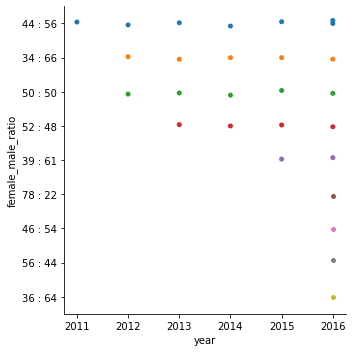

In [66]:
sns.catplot(x= "year", y="female_male_ratio",data=df_tr)

In [67]:
#Amerika ve Türkiye için oluşturduğum data frameleri birleştiriyorum. Biraz basit bir şekilde yazdım, daha doğrusunu bilen lütfen bana iletsin.

In [68]:
df_usatr = pd.concat([df_tr,df_usa])

In [69]:
df_usatr

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
111,112,Bilkent University,Turkey,34.3,47.7,36.1,95.7,32.4,55.4,NaN,18.445283,NaN,NaN,2011
182,183,Middle East Technical University,Turkey,39.5,27.2,39.5,66.4,43.9,47.7,"25,779",22.200000,7%,44 : 56,2011
401,201-225,Bilkent University,Turkey,27.9,48.5,22.3,60.8,29.4,-,NaN,18.445283,NaN,NaN,2012
480,276-300,Istanbul Technical University,Turkey,25.1,18.9,18.2,48.9,99.1,-,"34,550",16.000000,5%,34 : 66,2012
482,276-300,Middle East Technical University,Turkey,37.0,23.5,28.9,35.1,43.2,-,"25,779",22.200000,7%,44 : 56,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2527,601-800,Ohio University,United States of America,25.0,33.6,14.9,24.6,30.1,-,"22,224",20.000000,10%,50 : 50,2016
2542,601-800,Rochester Institute of Technology,United States of America,17.4,29.8,13.4,25.1,30.4,-,"12,965",13.500000,13%,34 : 66,2016
2564,601-800,University of Southern Mississippi,United States of America,21.0,20.8,11.8,20.1,39.9,-,"14,569",18.500000,3%,63 : 37,2016
2574,601-800,University of Texas at El Paso,United States of America,18.6,30.4,18.7,18.4,-,-,"19,123",29.000000,7%,54 : 46,2016


In [296]:
#Aşağıdaki(297.satır) kodu şu linkten aldım:https://stackoverflow.com/questions/35692781/python-plotting-percentage-in-seaborn-bar-plot

In [297]:
def with_hue(plot, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12)
    plt.show()

def without_hue(plot, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()


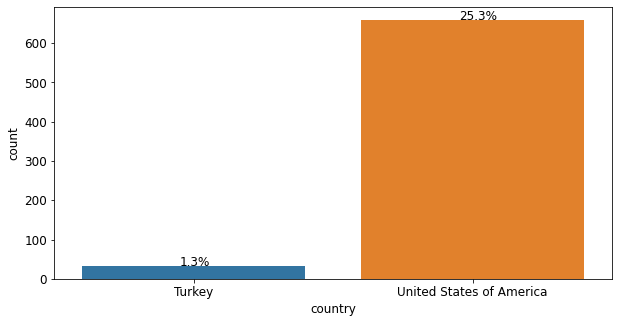

In [72]:
plt.figure(figsize=(10,5))
ax = sns.countplot("country", data=df_usatr) 
plt.xticks(size=12)
plt.xlabel("country",size=12)
plt.yticks(size=12)
plt.ylabel("count",size=12)

without_hue(ax, df.country)

In [73]:
#Bütün ülkelerin olduğu grafik

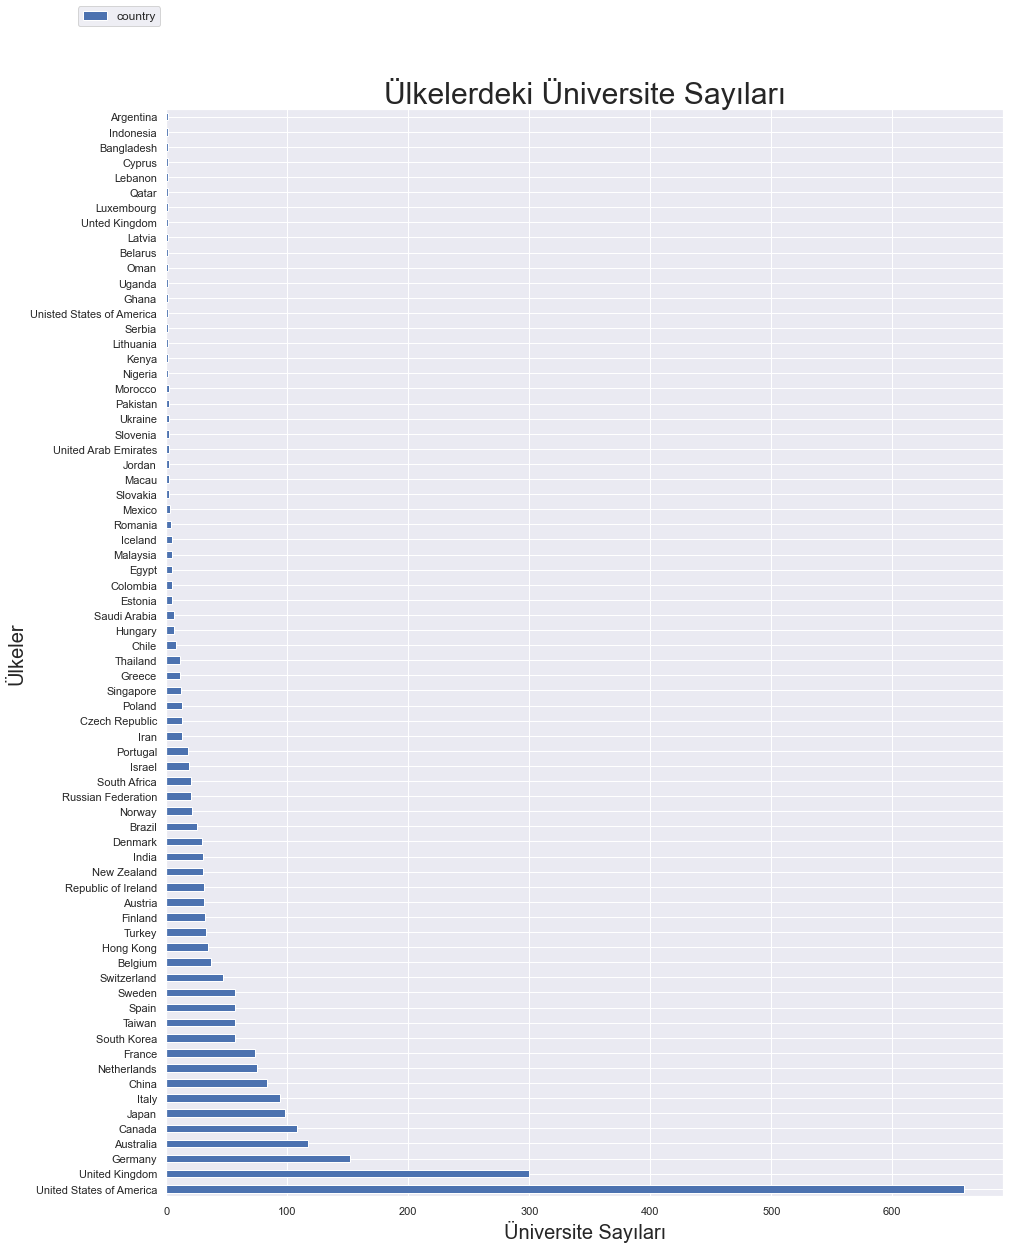

In [323]:
ax=df["country"].value_counts().plot.barh(figsize=(15,20),
                                      )#label="big"
ax.axes.set_title("Ülkelerdeki Üniversite Sayıları",fontsize=30)
ax.legend( fontsize=12,bbox_to_anchor=(0,1.1))
ax.set_xlabel('Üniversite Sayıları',fontsize=20);
ax.set_ylabel('Ülkeler',fontsize=20);

# Worldcloud
Worldcloud'u yaparken buradan baktım:https://www.kaggle.com/kanncaa1/plotly-tutorial-for-beginners

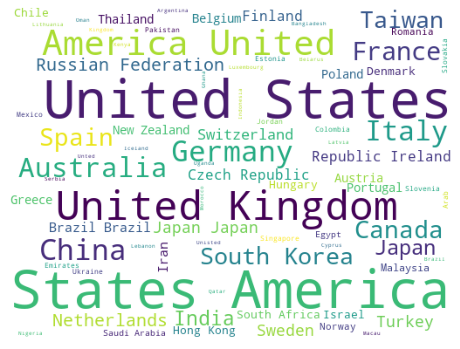

In [75]:
# data prepararion
x2016 = df.country[df.year == 2016]
plt.subplots(figsize=(8,8))
wordcloud = WordCloud(
                          background_color='white',
                          width=512,
                          height=384
                         ).generate(" ".join(x2016))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [76]:
#ülkelerin atıf sayılarını gösterdiğim grafik

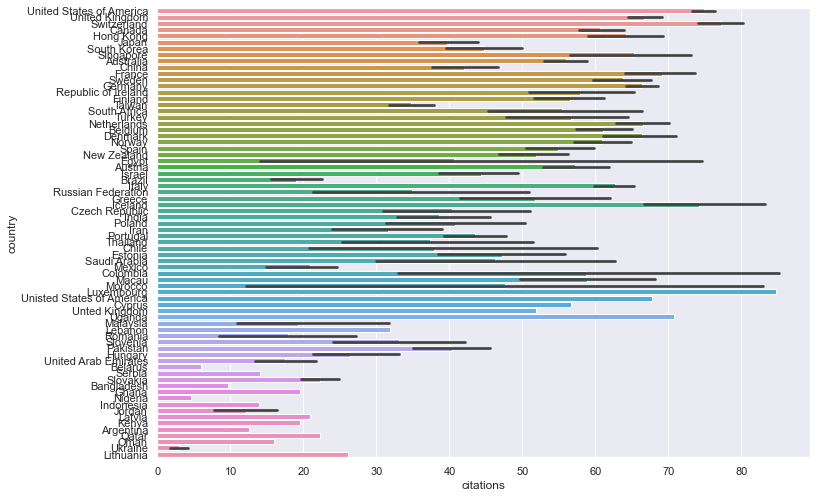

In [335]:
sns.barplot(x="citations",y="country",data=df)


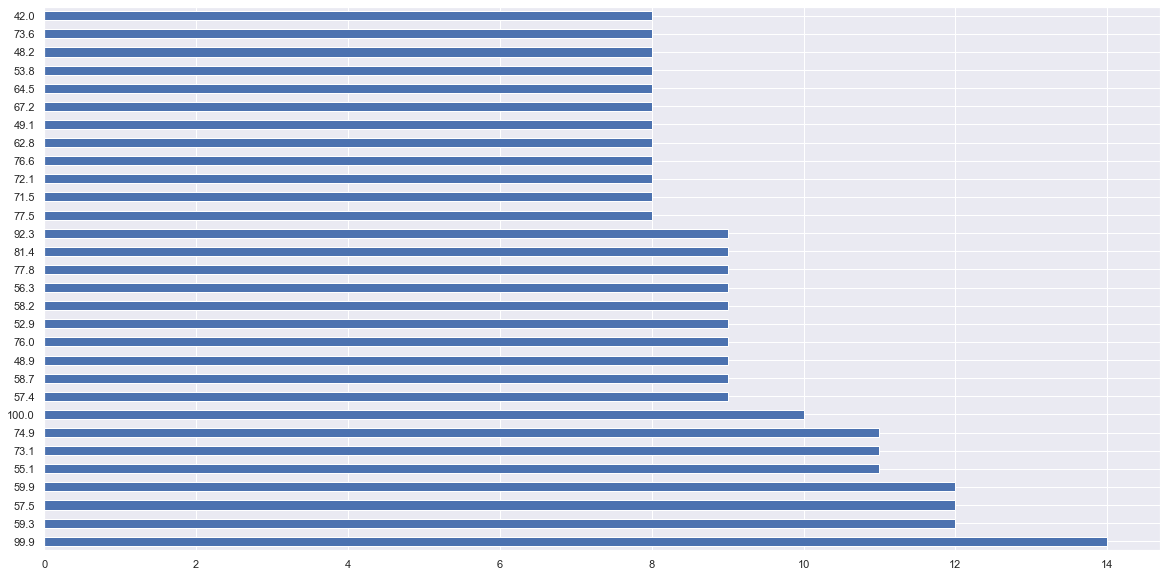

In [347]:
df["citations"].value_counts().head(30).plot(kind='barh', figsize=(20,10))


In [81]:
df.columns

Index(['world_rank', 'university_name', 'country', 'teaching', 'international',
       'research', 'citations', 'income', 'total_score', 'num_students',
       'student_staff_ratio', 'international_students', 'female_male_ratio',
       'year'],
      dtype='object')

In [82]:
#mean=df["country"].value_counts().mean()
#median=df["country"].value_counts().median()

In [83]:
df_countries=df["country"].value_counts()
#df_countries

In [84]:
#df_countries.loc["Average"]=36

In [85]:
#df_countries.plot.barh(figsize=(15,28))

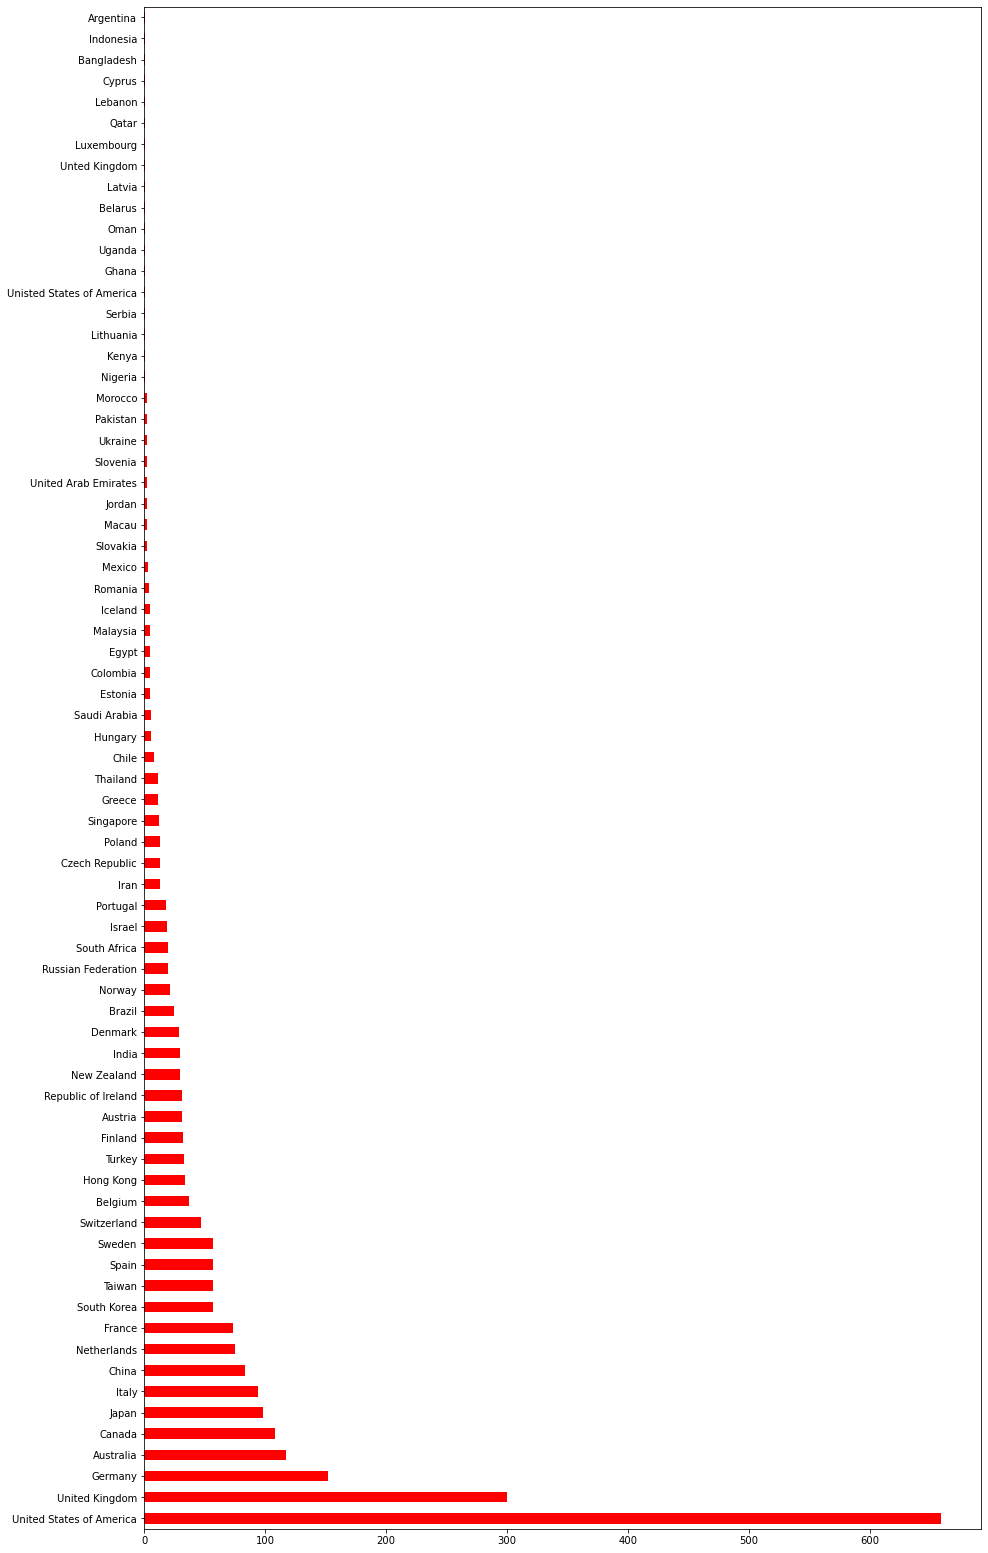

In [86]:
df["country"].value_counts().plot.barh(figsize=(15,28),color="red")

In [87]:
#daha sonra üstteki grafikteki her değerin renklerini değere göre değiştireceğim

# Bar chart raise kullanımı
Bar chart raise kullanarak video ülkelerin listedeki üniversite sayısını videoya dönüştürme.

In [88]:
#pip install bar_chart_race

In [89]:
import bar_chart_race as bcr

In [90]:
import subprocess as sp

In [91]:
#bcr.bar_chart_race(df=df)

In [92]:
#conda install -c conda-forge/label/cf202003 ffmpeg-python


In [93]:
#pip install ffmpeg

In [94]:
#Not: Aşağıdaki bar_chart lar çalışıyordu, fakat sonra ffmpeg'den dolayı hata verdi. Tekrar bakacağım.

In [95]:
#bcr.bar_chart_race(df=df, title="Ülkelerin Liste'deki Üniversite Sayısı")

In [96]:
#dikey şekilde gösterme

In [97]:
#bcr.bar_chart_race(df=df, title="Ülkelerin Liste'deki Üniversite Sayısı",n_bars=10, orientation="v")

In [98]:
#bcr.bar_chart_race(df=df, title="Ülkelerin Liste'deki Üniversite Sayısı",n_bars=10, orientation="h", fixed_order=True, cmap="prism")

In [99]:
from matplotlib.animation import FuncAnimation

In [100]:
#period_length ile süreyi uzatıyorum

In [101]:
""""v=bcr.bar_chart_race(df=df, title="Ülkelerin Liste'deki Üniversite Sayısı",
                    orientation="h",#n_bars=7 
                   fixed_order=True, cmap="prism",bar_size=.95,
                   period_length=1000,
                   figsize=(4,3))
#v#ileride bunu kaydetmeye çalışacağım"""

'"v=bcr.bar_chart_race(df=df, title="Ülkelerin Liste\'deki Üniversite Sayısı",\n                    orientation="h",#n_bars=7 \n                   fixed_order=True, cmap="prism",bar_size=.95,\n                   period_length=1000,\n                   figsize=(4,3))\n#v#ileride bunu kaydetmeye çalışacağım'

In [102]:
#pip install opencv-python

In [103]:
import cv2

In [105]:
#https://www.kaggle.com/prixeraq/times-ranking-analysis buradan aldığım kodlar

In [349]:
"""df['world_rank'] = pd.to_numeric(df['world_rank'], errors='coerce')
df['world_rank'].fillna(101, inplace=True)
df['world_rank'] = (df['world_rank'] * -1)
str_cols = df.select_dtypes(['object']).columns
df[str_cols] = df[str_cols].replace('-', 0)
df['num_students'] = df['num_students'].str.replace(',', '')
df['international_students'] = df['international_students'].str.replace('%', '')
df[str_cols] = df[str_cols].apply(pd.to_numeric, errors='coerce', axis=1)
df['international_students'] = df['international_students'] / 100"""


"df['world_rank'] = pd.to_numeric(df['world_rank'], errors='coerce')\ndf['world_rank'].fillna(101, inplace=True)\ndf['world_rank'] = (df['world_rank'] * -1)\nstr_cols = df.select_dtypes(['object']).columns\ndf[str_cols] = df[str_cols].replace('-', 0)\ndf['num_students'] = df['num_students'].str.replace(',', '')\ndf['international_students'] = df['international_students'].str.replace('%', '')\ndf[str_cols] = df[str_cols].apply(pd.to_numeric, errors='coerce', axis=1)\ndf['international_students'] = df['international_students'] / 100"

In [113]:
#income içindeki - değerleri 0'a çevirme

In [114]:
df["income"] = df["income"].replace(['-'],0)


In [115]:
df["income"]=pd.to_numeric(df["income"])
df.dtypes

world_rank                 object
university_name            object
country                    object
teaching                  float64
international              object
research                  float64
citations                 float64
income                    float64
total_score                object
num_students               object
student_staff_ratio       float64
international_students     object
female_male_ratio          object
year                        int64
dtype: object

In [116]:
df["total_score"] = df["total_score"].replace(['-'],0)
df["total_score"]=pd.to_numeric(df["total_score"])
df.dtypes

world_rank                 object
university_name            object
country                    object
teaching                  float64
international              object
research                  float64
citations                 float64
income                    float64
total_score               float64
num_students               object
student_staff_ratio       float64
international_students     object
female_male_ratio          object
year                        int64
dtype: object

In [117]:
df["total_score"]

0       96.1
1       96.0
2       95.6
3       94.3
4       94.2
        ... 
2598     0.0
2599     0.0
2600     0.0
2601     0.0
2602     0.0
Name: total_score, Length: 2603, dtype: float64

In [118]:
df["num_students"]


0       20,152
1        2,243
2       11,074
3       15,596
4        7,929
         ...  
2598    21,958
2599    31,268
2600     4,122
2601    10,117
2602     8,663
Name: num_students, Length: 2603, dtype: object

In [119]:
df["year"] = df["year"].replace(['-'],0)
df["year"]=pd.to_numeric(df["year"])
df["year"]

0       2011
1       2011
2       2011
3       2011
4       2011
        ... 
2598    2016
2599    2016
2600    2016
2601    2016
2602    2016
Name: year, Length: 2603, dtype: int64

In [121]:
#bu daha iyi çalışıyor

In [122]:
is_2011=df["year"]==2011
is_2011.head()

0    True
1    True
2    True
3    True
4    True
Name: year, dtype: bool

# En çok öğrencisi olan üniversiteler (tr)

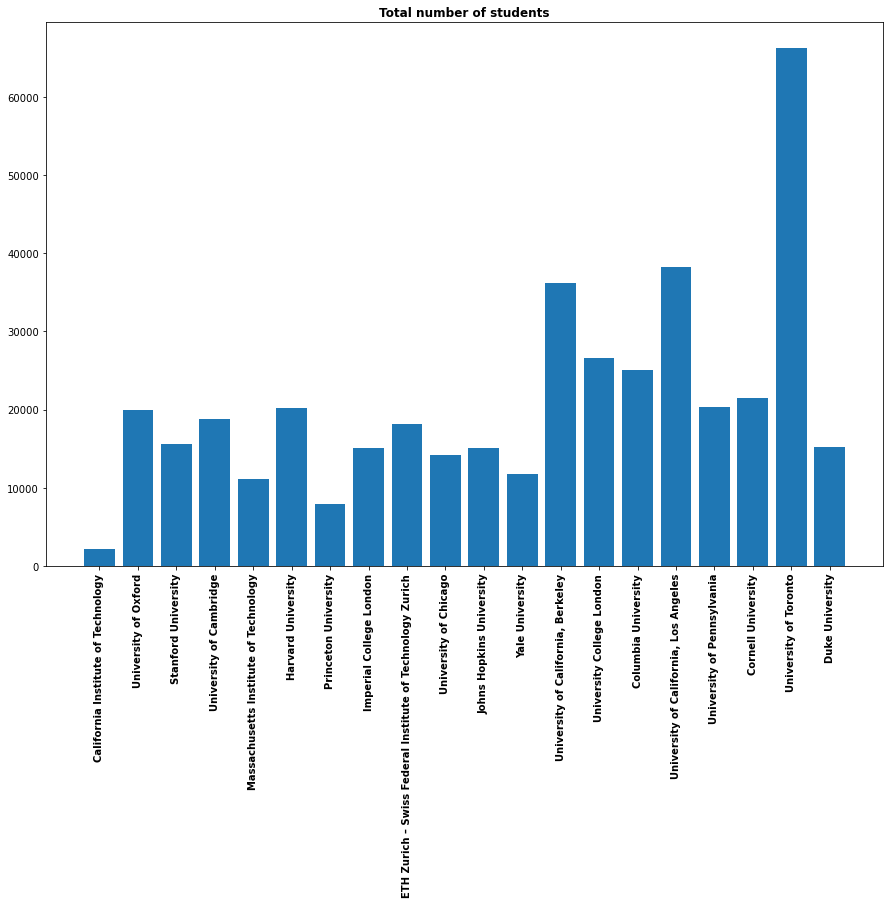

In [125]:
#total_scoreu 82'den yüksek en çok öğrencisi olan üniversiteler
best=df[(df["total_score"]>=82) & (df["year"] ==2016)].head(20)

num_student=best["num_students"].tolist()
dizi=[]
for i in num_student:
    i=i.replace(",","")
    i=int(i)
    dizi.append(i)


liste=best["university_name"].tolist()

plt.figure(figsize=(15,10))
plt.bar(liste,dizi)
plt.xticks(liste,rotation="vertical",size=10,weight="bold")
plt.title("Total number of students",weight="bold")
plt.show()

In [133]:
#df = df["international_students"].fillna(value=df["international_students"].mean())

In [134]:
#df['international_students'] = df['international_students'].str.rstrip('%').astype('float') / 100.0


In [136]:
df["international_students"].isnull().sum()

67

In [141]:
#df["international_students"] = df["international_students"].fillna(value=df["international_students"].mean())

In [149]:
df["international_students"] = df["international_students"].fillna(value=df["international_students"].mean())

In [154]:
df["international_students"].isnull().sum()

0

In [ ]:
#Şu anda df["international_students"] içindeki bütün null değerler 0

In [158]:
df[df["country"]=="Turkey"]["international_students"].mean()


0.01

In [159]:
df[df["country"]=="Turkey"]["international_students"].min()


0.01

In [160]:
df[df["country"]=="Turkey"]["international_students"].max()
#En fazla olan

0.15444006309148187

In [ ]:
#Listedeki türkiyedeki okulların yabancı öğrenci oranı ortalaması %7

In [163]:
df[df["country"]=="Turkey"]

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
111,112,Bilkent University,Turkey,34.3,47.7,36.1,95.7,32.4,55.4,NaN,18.445283,0.15444,NaN,2011
182,183,Middle East Technical University,Turkey,39.5,27.2,39.5,66.4,43.9,47.7,"25,779",22.200000,0.07000,44 : 56,2011
401,201-225,Bilkent University,Turkey,27.9,48.5,22.3,60.8,29.4,0.0,NaN,18.445283,0.15444,NaN,2012
480,276-300,Istanbul Technical University,Turkey,25.1,18.9,18.2,48.9,99.1,0.0,"34,550",16.000000,0.05000,34 : 66,2012
482,276-300,Middle East Technical University,Turkey,37.0,23.5,28.9,35.1,43.2,0.0,"25,779",22.200000,0.07000,44 : 56,2012
506,301-350,Boğaziçi University,Turkey,24.5,36.2,19.7,45.7,34.7,0.0,"11,506",25.000000,0.07000,50 : 50,2012
808,201-225,Middle East Technical University,Turkey,50.8,28.0,46.0,44.6,50.6,0.0,"25,779",22.200000,0.07000,44 : 56,2013
827,226-250,Bilkent University,Turkey,34.7,42.0,30.5,60.1,39.9,0.0,NaN,18.445283,0.15444,NaN,2013
834,226-250,Koç University,Turkey,20.4,52.8,22.3,79.2,37.9,0.0,"4,488",14.600000,0.08000,52 : 48,2013
881,276-300,Boğaziçi University,Turkey,35.4,36.7,33.9,48.1,38.4,0.0,"11,506",25.000000,0.07000,50 : 50,2013


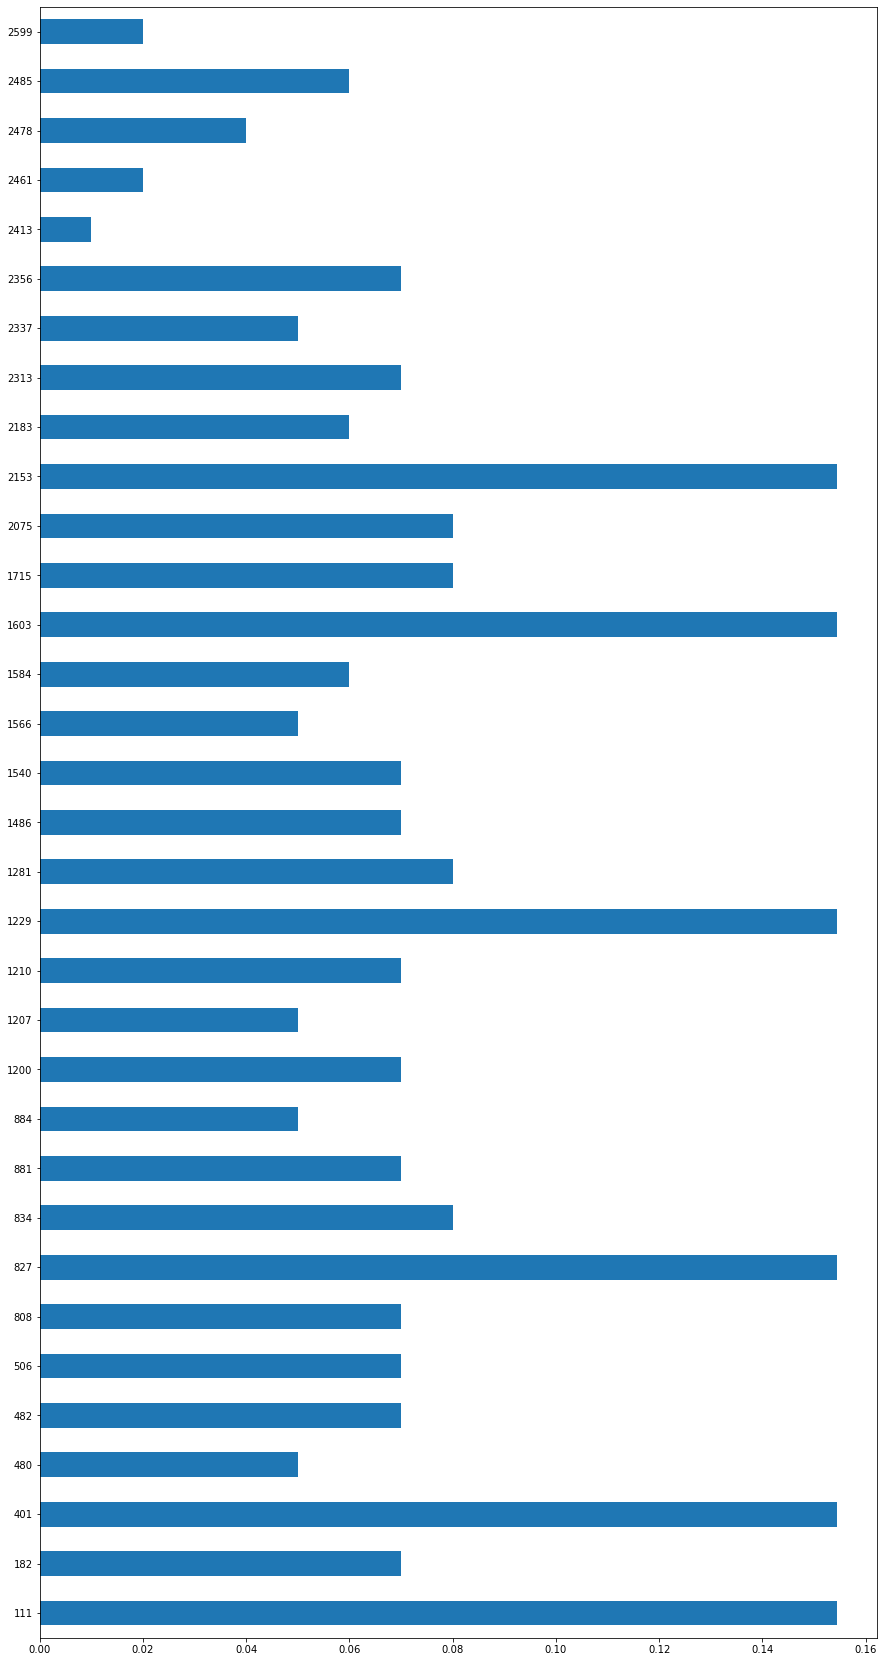

In [162]:
df[df["country"]=="Turkey"]["international_students"].plot.barh();

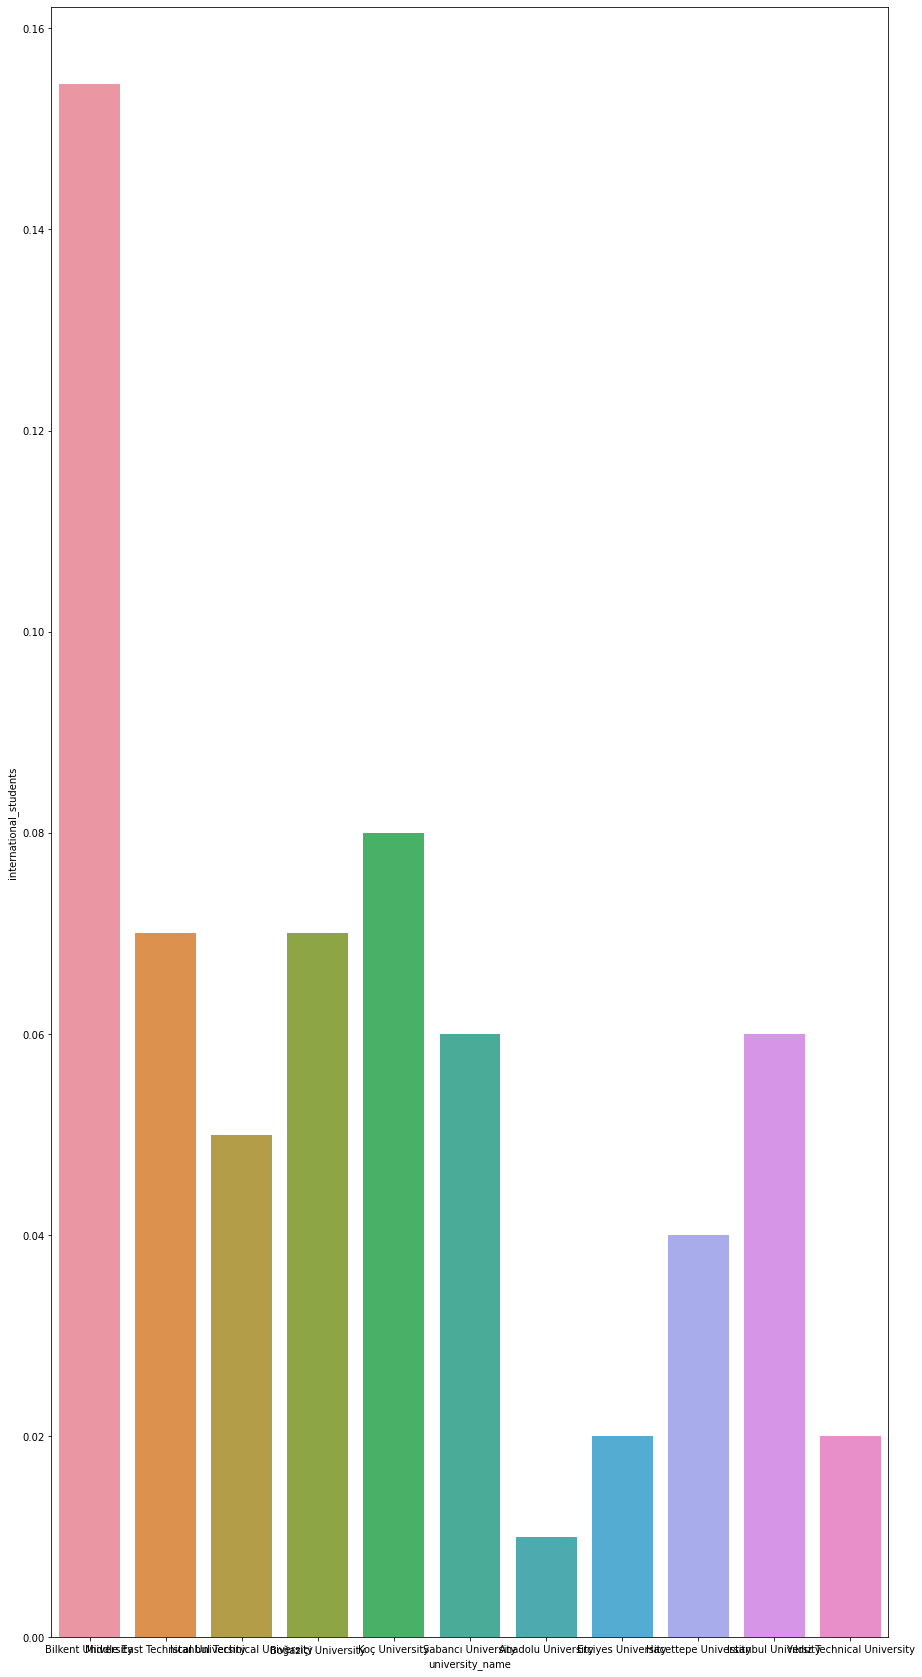

In [172]:
sns.barplot(x= "university_name",y ="international_students" , data=df[df["country"]=="Turkey"])

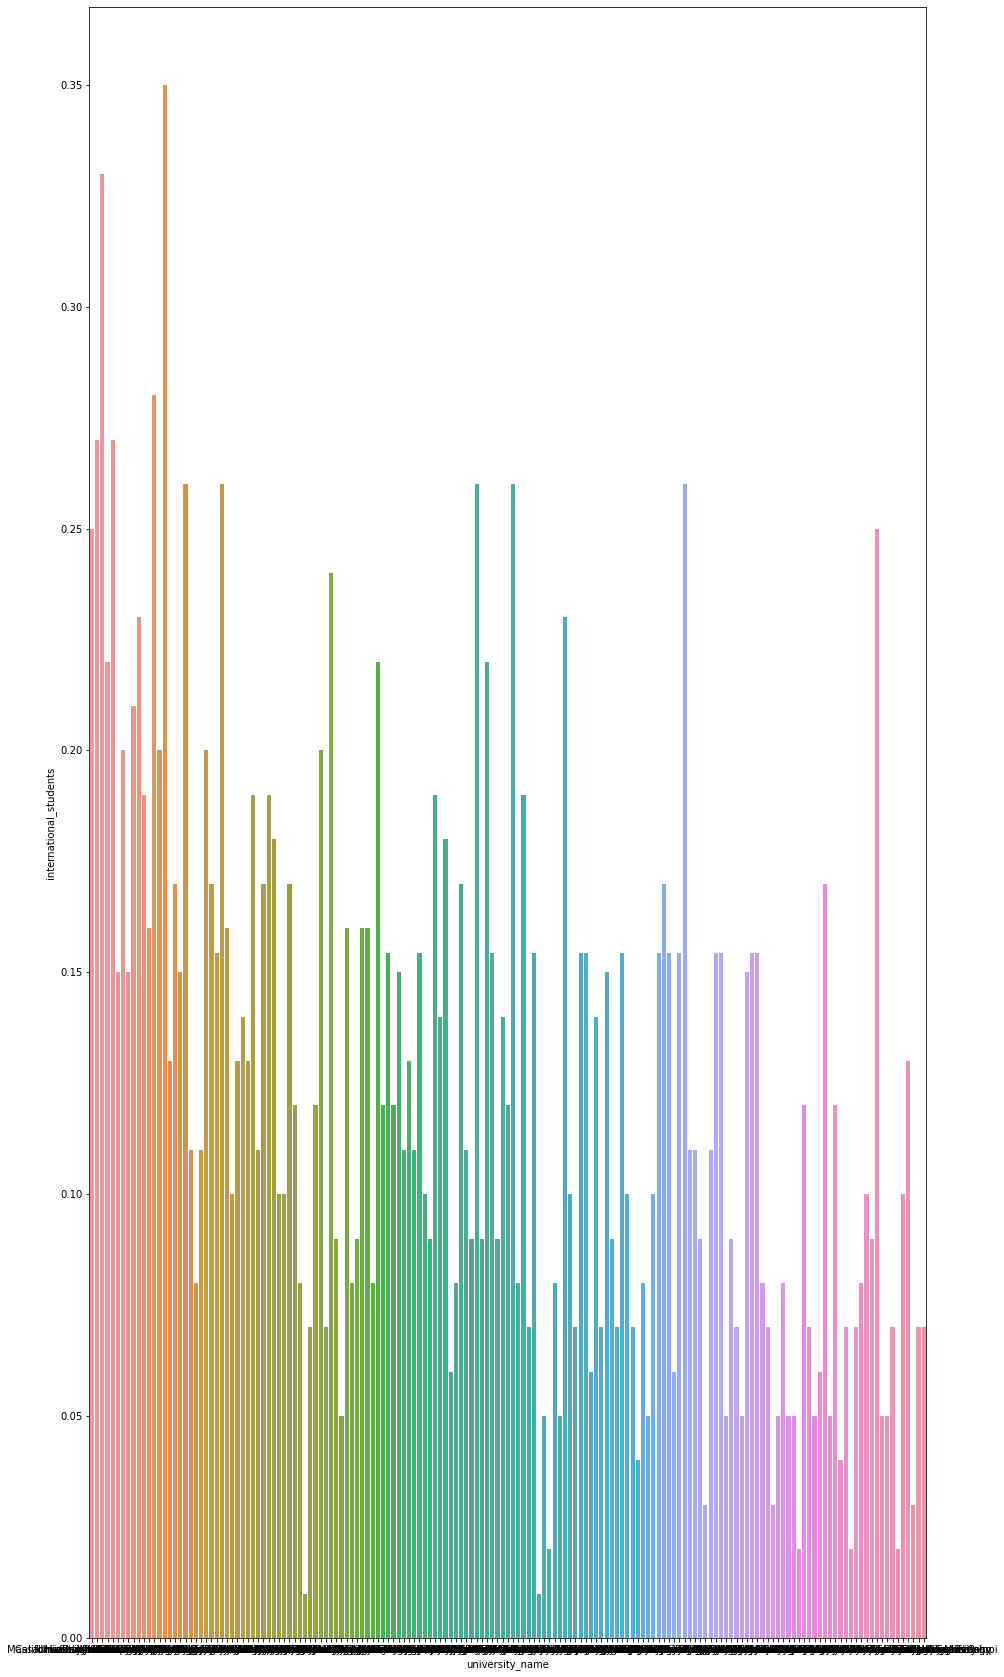

In [173]:
sns.barplot(x= "university_name",y ="international_students" , data=df[df["country"]=="United States of America"])

In [ ]:
#df["international"] = df["international"].replace(['-'],0)


In [174]:
#df[df["country"]=="Turkey"]["international"].mean()
#df["international"] = df["international"].replace(['-'],0)


In [ ]:
df.dtypes

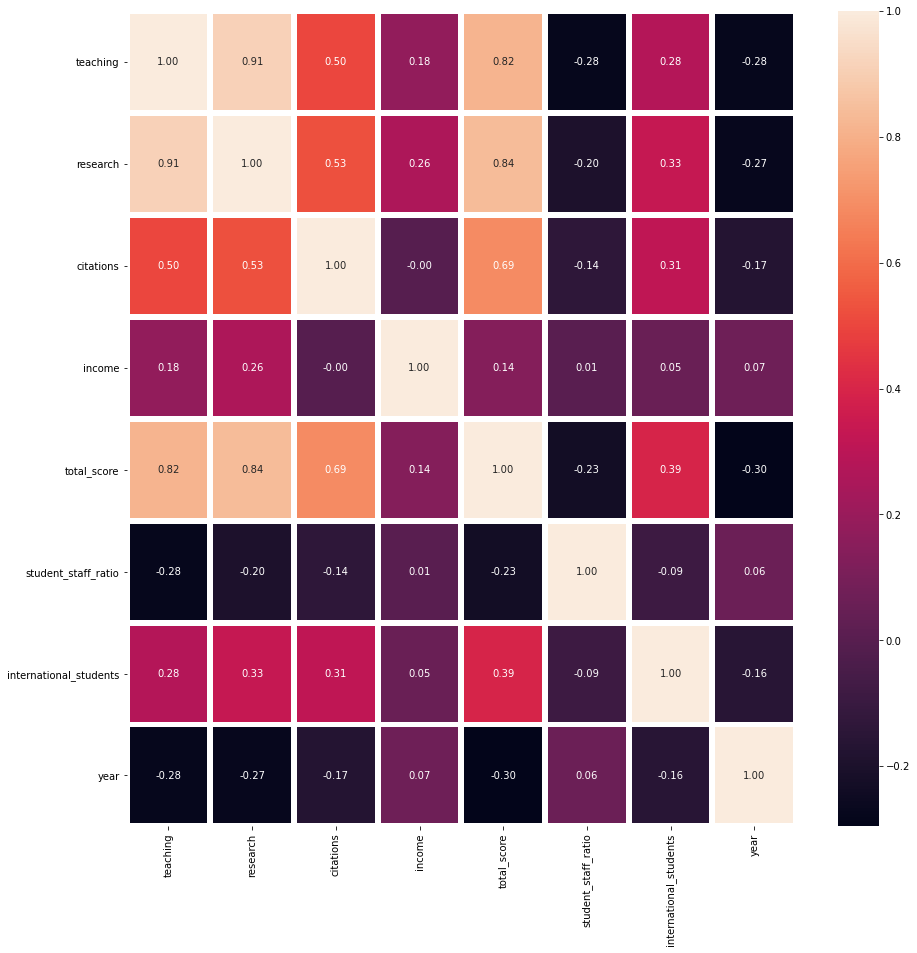

In [203]:
f,ax = plt.subplots(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,linewidths=5,fmt=".2f",ax=ax)
plt.show()

In [214]:
df2["country"].value_counts()

USA                     573
China                   167
Japan                   159
United Kingdom          144
Germany                 115
France                  109
Italy                    96
Spain                    81
South Korea              72
Canada                   72
Australia                58
Taiwan                   46
Brazil                   36
India                    31
Netherlands              29
Switzerland              26
Sweden                   24
Austria                  24
Israel                   22
Turkey                   20
Belgium                  20
Finland                  20
Poland                   18
Iran                     16
Ireland                  16
Greece                   14
Portugal                 14
Hungary                  12
New Zealand              12
Denmark                  12
Norway                   12
Hong Kong                12
South Africa             10
Czech Republic           10
Russia                    9
Chile               

In [ ]:
#listedeki türk üniversiteler

In [226]:
df2[df2["country"]=="Turkey"].loc[:,"institution":"national_rank"] 


,institution,country,national_rank
595,Middle East Technical University,Turkey,1
801,Istanbul University,Turkey,2
854,Hacettepe University,Turkey,3
972,Istanbul Technical University,Turkey,4
987,Ankara University,Turkey,5
1007,Ege University,Turkey,6
1055,Bilkent University,Turkey,7
1099,Gazi University,Turkey,8
1102,Boğaziçi University,Turkey,9
1133,Dokuz Eylül University,Turkey,10


In [374]:
df3=df[df["country"]=="Turkey"]
trace1 = go.Bar(
                x = df3.university_name,
                y = df3.citations,
                name = "citations",
                marker = dict(color = 'red',
                             line=dict(color='white')),
                text = df3.country)
trace2 = go.Bar(
                x = df3.university_name,
                y = df3.income,
                name = "income",
                marker = dict(color = 'yellow',
                              line=dict(color='white')),
                text = df3.country)
data=[trace1, trace2]
layout = go.Layout(barmode = "group")

fig = go.Figure(data = data, layout = layout)
iplot(fig)